In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

gpus = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2048)])

In [2]:
#Reading input data for training and testing

# Getting current working directory and storing it as a string variable and reading all empty seat readings into one dataframe

directory_in_str = "E:\\Haritha\\MasterThesis\\ModelTraining\\aa_measurements\\March\\combined_adc_measurements"
Emptyfilelist = []
empty = pd.DataFrame()
print("Adding the following files : ")
for file in os.listdir(directory_in_str) :
    if file.startswith("adc_empty") :
        print(file)
        filepathempty = directory_in_str +"\\" + file
        df1 = pd.read_csv(filepathempty, sep = '\t', engine = 'python', header = None)
        empty  = empty.append(df1)
    else :
        continue  
 
empty["Label"] = 0
empty.head()

Adding the following files : 
adc_empty11_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\1554285444.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_empty1_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\1554285444.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_empty1_morelieddown_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\1554285444.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_empty21_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\1554285444.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_empty2_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\1554285444.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_empty2_morelieddown_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\1554285444.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_empty3_morelieddown_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\1554285444.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_empty4_morestraightup_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\1554285444.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_empty5_morestraightup_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\1554285444.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_empty6_morestraightup_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\1554285444.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_empty_1_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\1554285444.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_empty_2_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\1554285444.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_empty_2_seatback_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\1554285444.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_empty_belted_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\1554285444.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_empty_doubtseatstraightup2_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\1554285444.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_empty_doubtstraightup1_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\1554285444.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_empty_error_sunshadeopen_phone_image_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\1554285444.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_empty_leanedleast_vertical2_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\1554285444.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_empty_leanedleast_vertical4_rightoriented_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\1554285444.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_empty_leanedmiddle1_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\1554285444.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_empty_normal1_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\1554285444.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_empty_normal2_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\1554285444.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_empty_normal3_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\1554285444.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_empty_normal4_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\1554285444.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_empty_normal5_handlecorrect_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\1554285444.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_empty_normal6_handlecorrect_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\1554285444.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_empty_normal7_handlecorrect_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\1554285444.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_empty_unbelted1_lstrapout.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\1554285444.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_empty_unbelted2_straps together.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\1554285444.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_empty_unbelted3_lstrapontop_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\1554285444.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_empty_unbelted4_rstrapontop_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\1554285444.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


,0,1,2,3,4,5,6,7,8,9,...,16391,16392,16393,16394,16395,16396,16397,16398,16399,Label
0,64,32768,1,1,512,0,1953125,12,0.0,0,...,-102,-105,-107,-110,-117,-120,-128,-139,-146,0
1,64,32768,1,1,512,0,1953125,12,0.0,0,...,-176,-185,-195,-202,-207,-218,-224,-231,-238,0
2,64,32768,1,1,512,0,1953125,12,0.0,0,...,-143,-146,-153,-165,-169,-175,-182,-189,-195,0
3,64,32768,1,1,512,0,1953125,12,0.0,0,...,-207,-209,-206,-204,-199,-198,-190,-184,-177,0
4,64,32768,1,1,512,0,1953125,12,0.0,0,...,-119,-125,-127,-132,-142,-149,-163,-169,-169,0


<AxesSubplot: >

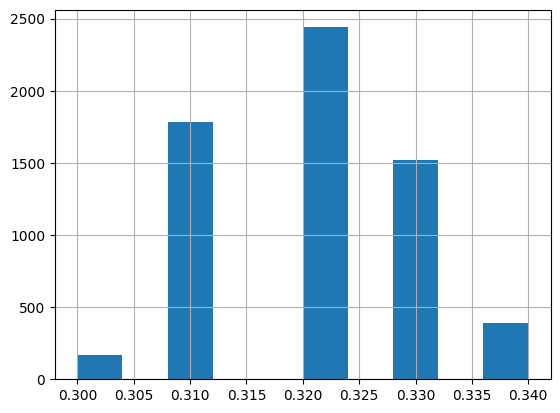

In [3]:
empty.iloc[:,10].hist()

In [4]:
# Empty seat Data ingest
empty.reset_index(inplace = True)

#Dropping anomalies
empty.drop(empty[empty.iloc[:,10]>=0.41].index,inplace = True)

#Index given is 16, as iloc uses n-1 as the end limit for 0:16 
empty.drop(empty.iloc[:,0:17] ,axis=1,inplace=True)
#empty = empty.T
empty.head()

,16,17,18,19,20,21,22,23,24,25,...,16391,16392,16393,16394,16395,16396,16397,16398,16399,Label
0,-80,-84,-91,-91,-808,-835,-844,-849,-835,-799,...,-102,-105,-107,-110,-117,-120,-128,-139,-146,0
1,-154,-164,-168,-552,-453,-354,-250,-148,-47,50,...,-176,-185,-195,-202,-207,-218,-224,-231,-238,0
2,-243,-249,-252,-253,129,213,282,337,374,393,...,-143,-146,-153,-165,-169,-175,-182,-189,-195,0
3,-203,-204,-206,207,272,323,355,372,380,371,...,-207,-209,-206,-204,-199,-198,-190,-184,-177,0
4,-208,-209,-208,379,393,397,384,360,315,257,...,-119,-125,-127,-132,-142,-149,-163,-169,-169,0


In [5]:
empty.shape

(6300, 16385)

In [6]:
# Reading all baby seat readings into one dataframe

baby = pd.DataFrame()
print("Adding the following files : ")
for file in os.listdir(directory_in_str) :
    if file.startswith("adc_baby") :
        print(file)
        filepathbaby = directory_in_str +"\\" +file
        df2 = pd.read_csv(filepathbaby, sep = '\t', engine = 'python',header = None)
        baby  = baby.append(df2)
    else :
        continue 

baby["Label"] = 1
baby.head()

Adding the following files : 
adc_baby11_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby1_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby1_morelieddown_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby21_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby2_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby2_morelieddown_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby3_morelieddown_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby4_morestraightup_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby5_morestraightup_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby6_morestraightup_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby_1_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby_2_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby_2_seatback_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby_doubtseatstraightupfeetpusheddown1_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby_doubtseatstraightupheadpushedup2_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby_hdown_fdown_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby_hdown_lfup_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby_hdown_rfup_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby_leanedleast_vertical1_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby_leanedleast_vertical3_leftoriented_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby_leanedmiddle2_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby_leanedmiddle_sunshade1_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby_lhup_fdown_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby_normal3_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby_normal4_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby_normal5_handlecorrect_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby_normal6_handlecorrect_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby_normal7_handlecorrect_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby_normalfeetdown1_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby_normalfeetdown2_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby_rhup_fdown_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_5420\674970141.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


,0,1,2,3,4,5,6,7,8,9,...,16391,16392,16393,16394,16395,16396,16397,16398,16399,Label
0,64,32768,1,1,512,0,1953125,12,0.0,0,...,-156,-165,-167,-160,-161,-164,-163,-168,-170,1
1,64,32768,1,1,512,0,1953125,12,0.0,0,...,-179,-176,-177,-178,-177,-178,-171,-164,-160,1
2,64,32768,1,1,512,0,1953125,12,0.0,0,...,-167,-169,-169,-173,-174,-176,-171,-165,-167,1
3,64,32768,1,1,512,0,1953125,12,0.0,0,...,-135,-130,-127,-123,-116,-114,-112,-114,-116,1
4,64,32768,1,1,512,0,1953125,12,0.0,0,...,-157,-157,-154,-153,-150,-147,-140,-136,-134,1


<AxesSubplot: >

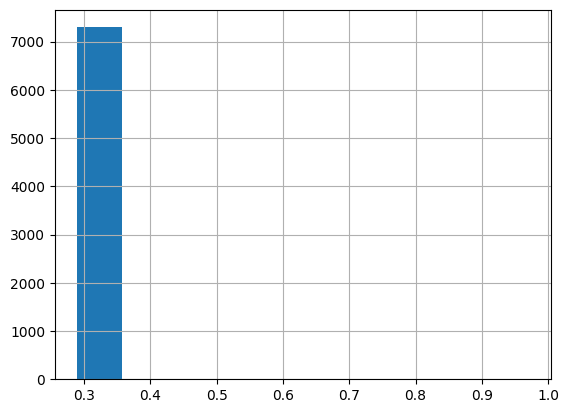

In [7]:
#Plotting the distance column to verify presence of any anomalies (where distance = 0.92 m or so)

baby.iloc[:,10].hist()

In [7]:
#Dropping anomalies
baby.drop(baby[baby.iloc[:,10]>=0.41].index,inplace = True)

In [11]:
total[total.isna().any(axis=1)]

,16,17,18,19,20,21,22,23,24,25,...,16391,16392,16393,16394,16395,16396,16397,16398,16399,Label


In [8]:
baby.reset_index(inplace = True)

#Index given is 16, as iloc uses n-1 as the end limit for 0:16 
# Baby seat Data ingest and attach Label = 1

baby.drop(baby.iloc[:,0:17] ,axis=1,inplace=True)
#baby = baby.T
baby.head()

,16,17,18,19,20,21,22,23,24,25,...,16391,16392,16393,16394,16395,16396,16397,16398,16399,Label
0,-165,-161,-159,-158,466,356,239,117,-5,-130,...,-156,-165,-167,-160,-161,-164,-163,-168,-170,1
1,-158,-157,-158,-153,-151,-478,-588,-683,-761,-816,...,-179,-176,-177,-178,-177,-178,-171,-164,-160,1
2,-168,-168,-172,-171,-166,-163,64,134,196,242,...,-167,-169,-169,-173,-174,-176,-171,-165,-167,1
3,-128,-132,-133,-134,-141,-42,54,142,222,286,...,-135,-130,-127,-123,-116,-114,-112,-114,-116,1
4,-130,-131,-127,-875,-860,-825,-772,-701,-615,-520,...,-145,-143,-136,-133,-129,-124,-121,-123,-124,1


In [9]:
baby.shape

(7176, 16385)

In [16]:
total = pd.concat([empty,baby])
total

,16,17,18,19,20,21,22,23,24,25,...,16391,16392,16393,16394,16395,16396,16397,16398,16399,Label
0,-80,-84,-91,-91,-808,-835,-844,-849,-835,-799,...,-102,-105,-107,-110,-117,-120,-128,-139,-146,0
1,-154,-164,-168,-552,-453,-354,-250,-148,-47,50,...,-176,-185,-195,-202,-207,-218,-224,-231,-238,0
2,-243,-249,-252,-253,129,213,282,337,374,393,...,-143,-146,-153,-165,-169,-175,-182,-189,-195,0
3,-203,-204,-206,207,272,323,355,372,380,371,...,-207,-209,-206,-204,-199,-198,-190,-184,-177,0
4,-208,-209,-208,379,393,397,384,360,315,257,...,-119,-125,-127,-132,-142,-149,-163,-169,-169,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7171,-144,-152,-158,-170,-769,-717,-641,-553,-460,-367,...,-203,-203,-199,-193,-186,-179,-174,-169,-160,1
7172,-153,-148,-142,-133,702,726,733,723,690,633,...,-95,-102,-109,-115,-121,-122,-130,-139,-141,1
7173,-147,-156,-827,-812,-778,-728,-658,-570,-479,-386,...,-117,-123,-126,-132,-143,-153,-161,-168,-177,1
7174,-185,-192,-199,-204,-478,-381,-290,-197,-110,-22,...,-109,-106,-104,-109,-114,-119,-125,-125,-128,1


In [17]:
total["Mean"]=total.iloc[:,0:16384].mean(axis=1)
total.head()

,16,17,18,19,20,21,22,23,24,25,...,16392,16393,16394,16395,16396,16397,16398,16399,Label,Mean
0,-80,-84,-91,-91,-808,-835,-844,-849,-835,-799,...,-105,-107,-110,-117,-120,-128,-139,-146,0,-154.342896
1,-154,-164,-168,-552,-453,-354,-250,-148,-47,50,...,-185,-195,-202,-207,-218,-224,-231,-238,0,-154.260193
2,-243,-249,-252,-253,129,213,282,337,374,393,...,-146,-153,-165,-169,-175,-182,-189,-195,0,-148.930176
3,-203,-204,-206,207,272,323,355,372,380,371,...,-209,-206,-204,-199,-198,-190,-184,-177,0,-149.010620
4,-208,-209,-208,379,393,397,384,360,315,257,...,-125,-127,-132,-142,-149,-163,-169,-169,0,-150.949707


In [20]:
total["Mean"].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0      -154.342896
1      -154.260193
2      -148.930176
3      -149.010620
4      -150.949707
           ...    
7171   -154.546326
7172   -154.577271
7173   -154.015747
7174   -160.194641
7175   -151.107910
Name: Mean, Length: 13476, dtype: float64>

In [22]:
#Shifting amplitudes by 150 (158.5)
totalindexnew = total.iloc[:,0:16384]
totalindexnew

MemoryError: Unable to allocate 1.65 GiB for an array with shape (16384, 13476) and data type int64

In [15]:
total["Max"]=total.iloc[:,0:16384].max(axis=1)
total.head()

,16,17,18,19,20,21,22,23,24,25,...,16392,16393,16394,16395,16396,16397,16398,16399,Label,Max
0,236,232,225,225,-492,-519,-528,-533,-519,-483,...,211,209,206,199,196,188,177,170,0,1801
1,162,152,148,-236,-137,-38,66,168,269,366,...,131,121,114,109,98,92,85,78,0,1756
2,73,67,64,63,445,529,598,653,690,709,...,170,163,151,147,141,134,127,121,0,1743
3,113,112,110,523,588,639,671,688,696,687,...,107,110,112,117,118,126,132,139,0,1746
4,108,107,108,695,709,713,700,676,631,573,...,191,189,184,174,167,153,147,147,0,1790


In [16]:
maxofmax = total["Max"].max(axis=0)
maxofmax

2431

In [17]:
tempmin = total.iloc[:,0:16384].min(axis=1)
tempmin.min()

-2169

In [18]:
total2 = pd.DataFrame()
total2 = total.iloc[:,0:16384].div(maxofmax)
total2

,16,17,18,19,20,21,22,23,24,25,...,16390,16391,16392,16393,16394,16395,16396,16397,16398,16399
0,0.097079,0.095434,0.092555,0.092555,-0.202386,-0.213492,-0.217195,-0.219251,-0.213492,-0.198684,...,0.089264,0.088030,0.086796,0.085973,0.084739,0.081859,0.080625,0.077334,0.072810,0.069930
1,0.066639,0.062526,0.060880,-0.097079,-0.056355,-0.015631,0.027149,0.069107,0.110654,0.150555,...,0.060058,0.057589,0.053887,0.049774,0.046894,0.044838,0.040313,0.037845,0.034965,0.032086
2,0.030029,0.027561,0.026327,0.025915,0.183052,0.217606,0.245989,0.268614,0.283834,0.291650,...,0.071575,0.071164,0.069930,0.067051,0.062114,0.060469,0.058001,0.055121,0.052242,0.049774
3,0.046483,0.046072,0.045249,0.215138,0.241876,0.262855,0.276018,0.283011,0.286302,0.282600,...,0.042781,0.044838,0.044015,0.045249,0.046072,0.048128,0.048540,0.051831,0.054299,0.057178
4,0.044426,0.044015,0.044426,0.285891,0.291650,0.293295,0.287947,0.278075,0.259564,0.235705,...,0.083093,0.081037,0.078568,0.077746,0.075689,0.071575,0.068696,0.062937,0.060469,0.060469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7171,0.070753,0.067462,0.064994,0.060058,-0.186343,-0.164953,-0.133690,-0.097491,-0.059235,-0.020979,...,0.046072,0.046483,0.046483,0.048128,0.050596,0.053476,0.056355,0.058412,0.060469,0.064171
7172,0.067051,0.069107,0.071575,0.075278,0.418758,0.428630,0.431510,0.427396,0.413821,0.390374,...,0.091320,0.090909,0.088030,0.085150,0.082682,0.080214,0.079803,0.076512,0.072810,0.071987
7173,0.069519,0.065817,-0.210202,-0.204031,-0.190045,-0.169478,-0.140683,-0.104484,-0.067051,-0.028795,...,0.085150,0.081859,0.079391,0.078157,0.075689,0.071164,0.067051,0.063760,0.060880,0.057178
7174,0.053887,0.051008,0.048128,0.046072,-0.066639,-0.026738,0.010695,0.048951,0.084739,0.120938,...,0.084327,0.085150,0.086384,0.087207,0.085150,0.083093,0.081037,0.078568,0.078568,0.077334


In [19]:
total2["Label"] =  total["Label"]
total2

,16,17,18,19,20,21,22,23,24,25,...,16391,16392,16393,16394,16395,16396,16397,16398,16399,Label
0,0.097079,0.095434,0.092555,0.092555,-0.202386,-0.213492,-0.217195,-0.219251,-0.213492,-0.198684,...,0.088030,0.086796,0.085973,0.084739,0.081859,0.080625,0.077334,0.072810,0.069930,0
1,0.066639,0.062526,0.060880,-0.097079,-0.056355,-0.015631,0.027149,0.069107,0.110654,0.150555,...,0.057589,0.053887,0.049774,0.046894,0.044838,0.040313,0.037845,0.034965,0.032086,0
2,0.030029,0.027561,0.026327,0.025915,0.183052,0.217606,0.245989,0.268614,0.283834,0.291650,...,0.071164,0.069930,0.067051,0.062114,0.060469,0.058001,0.055121,0.052242,0.049774,0
3,0.046483,0.046072,0.045249,0.215138,0.241876,0.262855,0.276018,0.283011,0.286302,0.282600,...,0.044838,0.044015,0.045249,0.046072,0.048128,0.048540,0.051831,0.054299,0.057178,0
4,0.044426,0.044015,0.044426,0.285891,0.291650,0.293295,0.287947,0.278075,0.259564,0.235705,...,0.081037,0.078568,0.077746,0.075689,0.071575,0.068696,0.062937,0.060469,0.060469,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7171,0.070753,0.067462,0.064994,0.060058,-0.186343,-0.164953,-0.133690,-0.097491,-0.059235,-0.020979,...,0.046483,0.046483,0.048128,0.050596,0.053476,0.056355,0.058412,0.060469,0.064171,1
7172,0.067051,0.069107,0.071575,0.075278,0.418758,0.428630,0.431510,0.427396,0.413821,0.390374,...,0.090909,0.088030,0.085150,0.082682,0.080214,0.079803,0.076512,0.072810,0.071987,1
7173,0.069519,0.065817,-0.210202,-0.204031,-0.190045,-0.169478,-0.140683,-0.104484,-0.067051,-0.028795,...,0.081859,0.079391,0.078157,0.075689,0.071164,0.067051,0.063760,0.060880,0.057178,1
7174,0.053887,0.051008,0.048128,0.046072,-0.066639,-0.026738,0.010695,0.048951,0.084739,0.120938,...,0.085150,0.086384,0.087207,0.085150,0.083093,0.081037,0.078568,0.078568,0.077334,1


In [20]:
train, test = train_test_split(total2, test_size=0.2, random_state=42, shuffle=True)

In [21]:
train.shape

(10780, 16385)

In [22]:
test.shape

(2696, 16385)

In [23]:
train

,16,17,18,19,20,21,22,23,24,25,...,16391,16392,16393,16394,16395,16396,16397,16398,16399,Label
1942,0.076100,0.073221,0.071987,0.070341,0.069107,0.039901,0.014809,-0.004525,-0.020568,-0.034965,...,0.067873,0.063760,0.061703,0.060469,0.058824,0.056355,0.055121,0.052653,0.053065,1
4506,0.047717,0.046483,0.046894,-0.012341,0.024681,0.062526,0.097902,0.135335,0.167421,0.195393,...,0.092555,0.092555,0.092555,0.092555,0.092555,0.092143,0.091732,0.090498,0.088030,1
5699,0.060469,0.060469,0.061703,0.061703,0.063348,0.247635,0.217606,0.185109,0.146853,0.106541,...,0.064582,0.062526,0.060880,0.060880,0.060058,0.062114,0.062114,0.059235,0.059646,1
2154,0.069930,0.068696,0.067462,0.066228,0.075689,0.054299,0.035376,0.017688,0.000411,-0.011107,...,0.070341,0.068696,0.071575,0.071575,0.069519,0.071987,0.070753,0.071164,0.071987,0
3617,0.061703,0.061703,0.062526,-0.057178,-0.050596,-0.039079,-0.025915,-0.009050,0.011518,0.032086,...,0.059235,0.058824,0.059235,0.057178,0.056767,0.058824,0.060469,0.061292,0.063348,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0.057178,0.057589,0.058001,0.058824,0.066639,0.039490,0.009050,-0.018100,-0.041547,-0.060469,...,0.071164,0.069930,0.070341,0.069519,0.067873,0.065405,0.062937,0.060880,0.061292,0
7118,0.083093,0.081859,0.080214,-0.171123,-0.191691,-0.204031,-0.211436,-0.214726,-0.211847,-0.199506,...,0.085973,0.088441,0.089264,0.088441,0.088030,0.088441,0.090086,0.089675,0.088852,1
5390,0.076100,0.075689,0.067873,0.094611,0.122583,0.148087,0.172357,0.197861,0.217195,0.231181,...,0.062526,0.065405,0.066639,0.068696,0.071164,0.072810,0.074044,0.073221,0.075278,0
860,0.082682,0.082271,0.080625,0.079803,0.217195,0.248457,0.271082,0.287947,0.298231,0.302756,...,0.070753,0.069519,0.072810,0.074866,0.075278,0.077334,0.076923,0.075689,0.078157,0


In [ ]:
X_train = train.iloc[:,0:16384]
#X_train = X_train/1000 - already divided by max
y_train = train['Label']

X_test = test.iloc[:,0:16384] 
#X_test = X_test/1000 - already divided by max
y_test = test['Label']

In [27]:
input_dim = len(X_train.columns)
input_dim

16384

In [28]:
neurons = 64
epochs = 30
model = Sequential()

In [29]:
model.add(Dense(neurons, input_dim = input_dim, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
history = model.fit(X_train,y_train, epochs=epochs, verbose=1, validation_split=0.33)
predictions= model.predict(X_test)

Epoch 1/30
201/201 [==============================] - 17s 55ms/step - loss: 0.3227 - accuracy: 0.8587 - val_loss: 0.1696 - val_accuracy: 0.9491
Epoch 2/30
201/201 [==============================] - 6s 32ms/step - loss: 0.1211 - accuracy: 0.9623 - val_loss: 0.1088 - val_accuracy: 0.9653
Epoch 3/30
201/201 [==============================] - 6s 30ms/step - loss: 0.0716 - accuracy: 0.9799 - val_loss: 0.0859 - val_accuracy: 0.9760
Epoch 4/30
201/201 [==============================] - 6s 31ms/step - loss: 0.0486 - accuracy: 0.9857 - val_loss: 0.0780 - val_accuracy: 0.9776
Epoch 5/30
201/201 [==============================] - 6s 28ms/step - loss: 0.0316 - accuracy: 0.9922 - val_loss: 0.0715 - val_accuracy: 0.9785
Epoch 6/30
201/201 [==============================] - 6s 31ms/step - loss: 0.0279 - accuracy: 0.9916 - val_loss: 0.0734 - val_accuracy: 0.9788
Epoch 7/30
201/201 [==============================] - 6s 30ms/step - loss: 0.0295 - accuracy: 0.9913 - val_loss: 0.0678 - val_accuracy: 0.978

In [34]:
predictions = (predictions > 0.5) *1

In [45]:
output = pd.DataFrame({'ID' : test.index, 'PreferredScore':predictions.flatten()})
output.to_csv('preferred15032023.csv', index=False)

In [35]:
scores = model.evaluate(X_test,y_test, verbose=1)
print(scores)

75/75 [==============================] - 1s 7ms/step - loss: 0.0668 - accuracy: 0.9858
[0.06683759391307831, 0.9858274459838867]


In [36]:
y_test

4813    1
1369    0
1718    0
1917    1
360     0
       ..
3316    1
5414    0
3851    0
3070    0
505     1
Name: Label, Length: 2399, dtype: int64

In [37]:
#Testing on measurements from another day - 13.04.2023

directory_in_str_new = "E:\\Haritha\\MasterThesis\\ModelTraining\\aa_measurements\\March\\combined_adc_measurements\\testing"
Emptyfilelistnew = []
emptynew = pd.DataFrame()
print("Adding the following files : ")
for file in os.listdir(directory_in_str_new) :
    if file.startswith("adc_empty") :
        print(file)
        filepathemptynew = directory_in_str_new +"\\" + file
        df1new = pd.read_csv(filepathemptynew, sep = '\t', engine = 'python',header = None)
        emptynew  = emptynew.append(df1new)
    else :
        continue  
        

#Dropping anomalies
emptynew.drop(emptynew[emptynew.iloc[:,10]>=0.41].index,inplace = True)

# Empty seat Data ingest and attach Label = 0
emptynew.reset_index(inplace = True)

#Index given is 16, as iloc uses n-1 as the end limit for 0:16 
emptynew.drop(emptynew.iloc[:,0:17] ,axis=1,inplace=True)
emptynew["Label"] = 0
#empty = empty.T
emptynew.head()



Adding the following files : 
adc_empty_error_readings_dist1m_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_4144\3753629889.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptynew  = emptynew.append(df1new)


adc_empty_error_sunshadeopen_phone_image_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_4144\3753629889.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptynew  = emptynew.append(df1new)


adc_empty_leanedleast_vertical1_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_4144\3753629889.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptynew  = emptynew.append(df1new)


adc_empty_leanedleast_vertical2_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_4144\3753629889.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptynew  = emptynew.append(df1new)


adc_empty_leanedleast_vertical3_leftoriented_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_4144\3753629889.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptynew  = emptynew.append(df1new)


adc_empty_leanedleast_vertical4_rightoriented_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_4144\3753629889.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptynew  = emptynew.append(df1new)


adc_empty_leanedmiddle1_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_4144\3753629889.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptynew  = emptynew.append(df1new)


adc_empty_leanedmiddle2_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_4144\3753629889.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptynew  = emptynew.append(df1new)


adc_empty_leanedmiddle_sunshade1_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_4144\3753629889.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptynew  = emptynew.append(df1new)


,16,17,18,19,20,21,22,23,24,25,...,16391,16392,16393,16394,16395,16396,16397,16398,16399,Label
0,-127,-127,-127,-126,-289,-230,-168,-109,-51,-7,...,-143,-142,-136,-136,-135,-133,-130,-127,-126,0
1,-126,-127,-125,-256,-196,-135,-73,-17,22,51,...,-140,-135,-136,-135,-131,-125,-123,-121,-121,0
2,-123,-124,-125,-129,-261,-203,-142,-87,-33,10,...,-167,-170,-163,-164,-161,-158,-154,-152,-143,0
3,-146,-144,-138,-132,-381,-428,-465,-489,-505,-507,...,-164,-160,-159,-154,-144,-137,-136,-136,-132,0
4,-129,-126,-124,-380,-418,-446,-464,-467,-458,-442,...,-171,-170,-166,-162,-160,-152,-143,-142,-143,0


In [38]:
# Repeating the above for baby readings from 13.04.2023

babynew = pd.DataFrame()
print("Adding the following files : ")
for file in os.listdir(directory_in_str_new) :
    if file.startswith("adc_baby") :
        print(file)
        filepathbabynew = directory_in_str_new +"\\" +file
        df2new = pd.read_csv(filepathbabynew, sep = '\t', engine = 'python',header = None)
        babynew  = babynew.append(df2new)
    else :
        continue 

#Dropping anomalies
babynew.drop(babynew[babynew.iloc[:,10]>=0.41].index,inplace = True)

babynew.reset_index(inplace = True)

#Index given is 16, as iloc uses n-1 as the end limit for 0:16 
# Baby seat Data ingest and attach Label = 1

babynew.drop(babynew.iloc[:,0:17] ,axis=1,inplace=True)
babynew["Label"] = 1
#baby = baby.T
babynew.head()

Adding the following files : 
adc_baby_leanedleast_vertical1_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_4144\3509644968.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babynew  = babynew.append(df2new)


adc_baby_leanedleast_vertical2_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_4144\3509644968.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babynew  = babynew.append(df2new)


adc_baby_leanedleast_vertical3_leftoriented_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_4144\3509644968.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babynew  = babynew.append(df2new)


adc_baby_leanedleast_vertical4_rightoriented_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_4144\3509644968.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babynew  = babynew.append(df2new)


adc_baby_leanedmiddle1_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_4144\3509644968.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babynew  = babynew.append(df2new)


adc_baby_leanedmiddle2_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_4144\3509644968.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babynew  = babynew.append(df2new)


adc_baby_leanedmiddle_sunshade1_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_4144\3509644968.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  babynew  = babynew.append(df2new)


,16,17,18,19,20,21,22,23,24,25,...,16391,16392,16393,16394,16395,16396,16397,16398,16399,Label
0,-129,-126,-125,-120,-382,-425,-457,-483,-491,-486,...,-161,-156,-155,-156,-147,-137,-135,-129,-129,1
1,-121,-121,-117,-465,-480,-483,-469,-450,-427,-395,...,-145,-135,-132,-133,-133,-126,-123,-122,-118,1
2,-115,-115,-114,-113,-473,-449,-424,-398,-366,-323,...,-188,-187,-183,-182,-182,-180,-177,-173,-170,1
3,-160,-152,-142,-45,-111,-177,-234,-286,-329,-374,...,-118,-122,-128,-136,-141,-147,-149,-155,-165,1
4,-167,-165,-166,-376,-302,-233,-167,-103,-42,21,...,-176,-174,-168,-162,-157,-153,-150,-147,-141,1


In [39]:
emptynew.shape

(700, 16385)

In [40]:
babynew.shape

(1400, 16385)

In [41]:
testnew = pd.concat([emptynew,babynew])

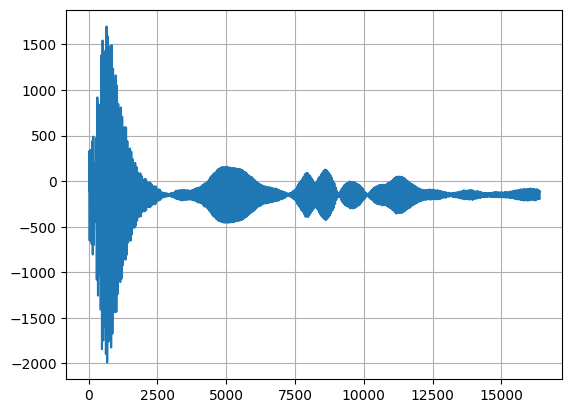

In [83]:
ax1 = testnew.iloc[0,0:16384].plot(legend=None)
ax1.grid(True)
#ax1.set_xlim(2500,5000)
#ax1.set_ylim(-1350,1350)

In [42]:
#Shifting amplitudes by 150 (158.5)
testnew.iloc[:,0:16384] = testnew.iloc[:,0:16384] + 150
testnew

,16,17,18,19,20,21,22,23,24,25,...,16391,16392,16393,16394,16395,16396,16397,16398,16399,Label
0,23,23,23,24,-139,-80,-18,41,99,143,...,7,8,14,14,15,17,20,23,24,0
1,24,23,25,-106,-46,15,77,133,172,201,...,10,15,14,15,19,25,27,29,29,0
2,27,26,25,21,-111,-53,8,63,117,160,...,-17,-20,-13,-14,-11,-8,-4,-2,7,0
3,4,6,12,18,-231,-278,-315,-339,-355,-357,...,-14,-10,-9,-4,6,13,14,14,18,0
4,21,24,26,-230,-268,-296,-314,-317,-308,-292,...,-21,-20,-16,-12,-10,-2,7,8,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,-1,-5,-8,-6,122,167,197,228,256,275,...,-5,-8,-9,-10,-11,-10,-8,-9,-2,1
1396,-12,-10,-6,47,98,149,194,225,251,273,...,0,-1,-2,-7,-11,-14,-16,-15,-11,1
1397,-7,1,5,7,5,2,0,293,298,285,...,-7,-5,1,-5,-12,-10,-7,-9,-8,1
1398,-7,-7,-5,136,175,202,235,261,282,294,...,-2,-3,-3,-4,-2,-6,-6,-5,-6,1


In [43]:
testnew["Max"]=testnew.iloc[:,0:16384].max(axis=1)
testnew.head()

,16,17,18,19,20,21,22,23,24,25,...,16392,16393,16394,16395,16396,16397,16398,16399,Label,Max
0,23,23,23,24,-139,-80,-18,41,99,143,...,8,14,14,15,17,20,23,24,0,1836
1,24,23,25,-106,-46,15,77,133,172,201,...,15,14,15,19,25,27,29,29,0,1833
2,27,26,25,21,-111,-53,8,63,117,160,...,-20,-13,-14,-11,-8,-4,-2,7,0,1813
3,4,6,12,18,-231,-278,-315,-339,-355,-357,...,-10,-9,-4,6,13,14,14,18,0,1802
4,21,24,26,-230,-268,-296,-314,-317,-308,-292,...,-20,-16,-12,-10,-2,7,8,7,0,1837


In [44]:
maxoftestmax = testnew["Max"].max(axis=0)
maxoftestmax

2107

In [45]:
tempmin = testnew.iloc[:,0:16384].min(axis=1)
tempmin.min()

-2219

In [46]:
test2 = pd.DataFrame()
test2 = testnew.iloc[:,0:16384].div(maxoftestmax)
test2

,16,17,18,19,20,21,22,23,24,25,...,16390,16391,16392,16393,16394,16395,16396,16397,16398,16399
0,0.010916,0.010916,0.010916,0.011391,-0.065971,-0.037969,-0.008543,0.019459,0.046986,0.067869,...,0.000475,0.003322,0.003797,0.006645,0.006645,0.007119,0.008068,0.009492,0.010916,0.011391
1,0.011391,0.010916,0.011865,-0.050308,-0.021832,0.007119,0.036545,0.063123,0.081633,0.095396,...,0.005221,0.004746,0.007119,0.006645,0.007119,0.009018,0.011865,0.012814,0.013764,0.013764
2,0.012814,0.012340,0.011865,0.009967,-0.052682,-0.025154,0.003797,0.029900,0.055529,0.075937,...,-0.008543,-0.008068,-0.009492,-0.006170,-0.006645,-0.005221,-0.003797,-0.001898,-0.000949,0.003322
3,0.001898,0.002848,0.005695,0.008543,-0.109635,-0.131941,-0.149502,-0.160892,-0.168486,-0.169435,...,-0.008068,-0.006645,-0.004746,-0.004271,-0.001898,0.002848,0.006170,0.006645,0.006645,0.008543
4,0.009967,0.011391,0.012340,-0.109160,-0.127195,-0.140484,-0.149027,-0.150451,-0.146179,-0.138586,...,-0.010441,-0.009967,-0.009492,-0.007594,-0.005695,-0.004746,-0.000949,0.003322,0.003797,0.003322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,-0.000475,-0.002373,-0.003797,-0.002848,0.057902,0.079260,0.093498,0.108211,0.121500,0.130517,...,-0.001424,-0.002373,-0.003797,-0.004271,-0.004746,-0.005221,-0.004746,-0.003797,-0.004271,-0.000949
1396,-0.005695,-0.004746,-0.002848,0.022307,0.046512,0.070717,0.092074,0.106787,0.119127,0.129568,...,-0.001424,0.000000,-0.000475,-0.000949,-0.003322,-0.005221,-0.006645,-0.007594,-0.007119,-0.005221
1397,-0.003322,0.000475,0.002373,0.003322,0.002373,0.000949,0.000000,0.139060,0.141433,0.135263,...,-0.003322,-0.003322,-0.002373,0.000475,-0.002373,-0.005695,-0.004746,-0.003322,-0.004271,-0.003797
1398,-0.003322,-0.003322,-0.002373,0.064547,0.083056,0.095871,0.111533,0.123873,0.133840,0.139535,...,0.000475,-0.000949,-0.001424,-0.001424,-0.001898,-0.000949,-0.002848,-0.002848,-0.002373,-0.002848


In [47]:
test2["Label"] =  testnew["Label"]
test2

,16,17,18,19,20,21,22,23,24,25,...,16391,16392,16393,16394,16395,16396,16397,16398,16399,Label
0,0.010916,0.010916,0.010916,0.011391,-0.065971,-0.037969,-0.008543,0.019459,0.046986,0.067869,...,0.003322,0.003797,0.006645,0.006645,0.007119,0.008068,0.009492,0.010916,0.011391,0
1,0.011391,0.010916,0.011865,-0.050308,-0.021832,0.007119,0.036545,0.063123,0.081633,0.095396,...,0.004746,0.007119,0.006645,0.007119,0.009018,0.011865,0.012814,0.013764,0.013764,0
2,0.012814,0.012340,0.011865,0.009967,-0.052682,-0.025154,0.003797,0.029900,0.055529,0.075937,...,-0.008068,-0.009492,-0.006170,-0.006645,-0.005221,-0.003797,-0.001898,-0.000949,0.003322,0
3,0.001898,0.002848,0.005695,0.008543,-0.109635,-0.131941,-0.149502,-0.160892,-0.168486,-0.169435,...,-0.006645,-0.004746,-0.004271,-0.001898,0.002848,0.006170,0.006645,0.006645,0.008543,0
4,0.009967,0.011391,0.012340,-0.109160,-0.127195,-0.140484,-0.149027,-0.150451,-0.146179,-0.138586,...,-0.009967,-0.009492,-0.007594,-0.005695,-0.004746,-0.000949,0.003322,0.003797,0.003322,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,-0.000475,-0.002373,-0.003797,-0.002848,0.057902,0.079260,0.093498,0.108211,0.121500,0.130517,...,-0.002373,-0.003797,-0.004271,-0.004746,-0.005221,-0.004746,-0.003797,-0.004271,-0.000949,1
1396,-0.005695,-0.004746,-0.002848,0.022307,0.046512,0.070717,0.092074,0.106787,0.119127,0.129568,...,0.000000,-0.000475,-0.000949,-0.003322,-0.005221,-0.006645,-0.007594,-0.007119,-0.005221,1
1397,-0.003322,0.000475,0.002373,0.003322,0.002373,0.000949,0.000000,0.139060,0.141433,0.135263,...,-0.003322,-0.002373,0.000475,-0.002373,-0.005695,-0.004746,-0.003322,-0.004271,-0.003797,1
1398,-0.003322,-0.003322,-0.002373,0.064547,0.083056,0.095871,0.111533,0.123873,0.133840,0.139535,...,-0.000949,-0.001424,-0.001424,-0.001898,-0.000949,-0.002848,-0.002848,-0.002373,-0.002848,1


In [48]:
X_testnew = test2.iloc[:,0:16384]
y_testnew = test2['Label']

In [49]:
y_testnew

0       0
1       0
2       0
3       0
4       0
       ..
1395    1
1396    1
1397    1
1398    1
1399    1
Name: Label, Length: 2100, dtype: int64

In [50]:
scores = model.evaluate(X_testnew,y_testnew, verbose=1)
print(scores)

66/66 [==============================] - 1s 8ms/step - loss: 4.3233 - accuracy: 0.5514
[4.323265075683594, 0.5514285564422607]


# Feature Importance

#### Calculating importances of features in relation to the Target Class (0-empty, 1-baby)

In [93]:
X_train

,16,17,18,19,20,21,22,23,24,25,...,16390,16391,16392,16393,16394,16395,16396,16397,16398,16399
1000,0.006490,0.008345,0.008809,0.101066,0.118683,0.133982,0.146963,0.155772,0.160872,0.154845,...,0.005100,0.005100,0.003709,-0.000927,-0.003709,-0.000927,-0.002782,-0.003245,-0.005100,-0.008809
1181,0.012517,0.012054,0.010663,-0.062587,-0.084376,-0.100603,-0.115902,-0.125637,-0.132592,-0.135373,...,0.012054,0.013908,0.012517,0.012054,0.014372,0.014835,0.014372,0.014372,0.012981,0.012517
1375,-0.010663,-0.012517,-0.011590,0.044043,0.070932,0.096894,0.120538,0.137691,0.149745,0.157163,...,-0.012054,-0.011590,-0.012517,-0.012981,-0.013908,-0.011590,-0.009736,-0.008809,-0.009272,-0.007881
2087,0.004172,0.005100,0.006027,-0.170607,-0.114511,-0.055633,0.000464,0.053315,0.110338,0.167826,...,-0.004172,-0.004636,-0.006027,-0.005100,-0.006490,-0.007418,-0.007881,-0.007418,-0.007418,-0.008809
2115,0.006027,0.006954,0.080204,0.104775,0.130274,0.148818,0.165508,0.175707,0.179416,0.178952,...,0.004172,0.000927,-0.000464,0.000464,0.002318,0.001854,-0.002782,-0.002782,-0.004172,-0.005100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,0.012517,0.010663,0.009736,0.008809,0.003709,0.047288,0.094576,0.140936,0.183588,0.223922,...,0.017617,0.016690,0.014835,0.014835,0.012054,0.010663,0.010199,0.008345,0.008345,0.006490
1491,-0.008809,-0.007881,-0.006027,0.052851,0.081131,0.108020,0.129346,0.147891,0.159944,0.165971,...,-0.004172,-0.003709,-0.006954,-0.006954,-0.007418,-0.006954,-0.009272,-0.009736,-0.009736,-0.010663
1690,0.000464,0.002782,0.006027,0.006027,0.028280,0.056560,0.084840,0.104312,0.120538,0.132128,...,-0.004636,-0.006954,-0.009736,-0.011127,-0.013445,-0.017617,-0.019471,-0.020399,-0.019471,-0.016226
860,0.019935,0.019471,0.017617,0.016690,0.171535,0.206769,0.232267,0.251275,0.262865,0.267965,...,0.004636,0.006490,0.005100,0.008809,0.011127,0.011590,0.013908,0.013445,0.012054,0.014835


In [94]:
y_train

1000    1
1181    0
1375    0
2087    1
2115    0
       ..
2034    1
1491    1
1690    1
860     0
3570    1
Name: Label, Length: 6569, dtype: int64

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(total.corr(),cmap='viridis',annot=False)

In [82]:
#Testing out feature importances with ExtraTrees Regressor Model

regmod = ExtraTreesRegressor()
regmod.fit(X_testnew,y_testnew)

#print(regmod.feature_importances_)

ExtraTreesRegressor()

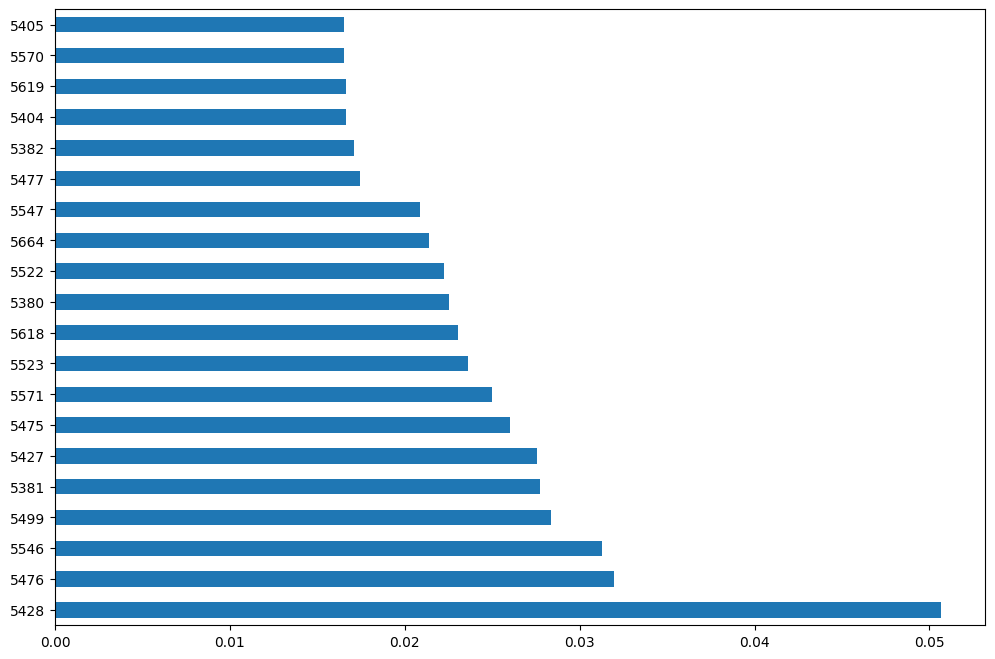

In [83]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(regmod.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

The above feature importances relate to the ADC data columns directly